         start  present   age        boh
0       2008.0     2022  14.0  Below 80%
1       2013.0     2022   9.0  Below 80%
2       2018.0     2022   4.0  Above 90%
3       2016.0     2022   6.0     80-90%
4       2018.0     2022   4.0  Above 90%
...        ...      ...   ...        ...
947913  2019.0     2022   3.0  Above 90%
947914  2015.0     2022   7.0     80-90%
947915  2018.0     2022   4.0  Above 90%
947916  2011.0     2022  11.0  Below 80%
947917  2013.0     2022   9.0  Below 80%

[947918 rows x 4 columns]


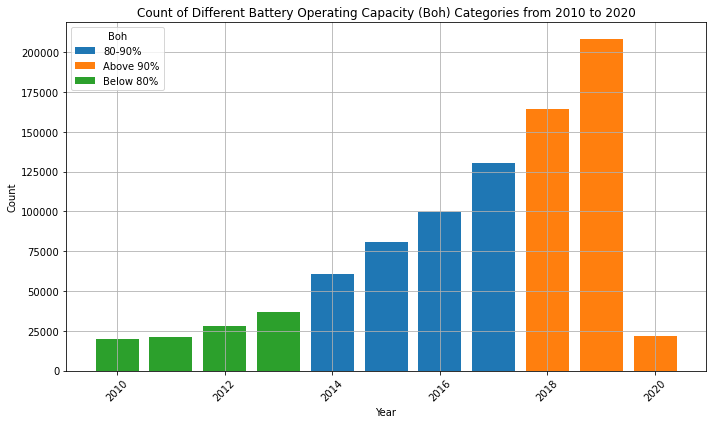

In [41]:
########## 3_1 Predicted Number of EVs by Year of Construction and Battery Health  #########
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Manually change the file path
file_path = r'C:\Users\varun\OneDrive - Maynooth University\0_BCP\New Files\test vehicle.csv'
df = pd.read_csv(file_path)

# Calculating age
df['present'] = df['test_date'].str[-4:]
df['present'] = pd.to_numeric(df['present'], errors='coerce')
df['start'] = df['first_use_date'].str[-4:]
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['age'] = df['present'] - df['start']

# Define functions to categorize battery health
def assign_value_boh(x):
    if x < 5:
        return 'Above 90%'
    elif 5 <= x <= 8:
        return '80-90%'
    elif x>8:
        return 'Below 80%'

df['boh'] = df['age'].apply(assign_value_boh)

# Calculate the counts of each year of construction
year_counts = df['start'].value_counts().reset_index()
year_counts.columns = ['start', 'Count']
year_counts = year_counts.sort_values(by='start', ascending=True)
# print(df)
new_df = df.loc[:, ['start', 'present', 'age', 'boh']]
print(new_df)

# Group the DataFrame by 'start' year and 'boh' and get the count of each group
grouped_df = new_df.groupby(['start', 'boh']).size().reset_index(name='Count')

# print(grouped_df)

df=grouped_df

# Filter the DataFrame for years between 2010 and 2020
df = df[(df['start'] >= 2010) & (df['start'] <= 2020)]

# Create a pivot table to prepare data for the bar graph
pivot_table = pd.pivot_table(df, values='Count', index='start', columns='boh', fill_value=0)

# Define the colors for different 'boh' categories
colors = plt.cm.tab10.colors

# Create the bar graph
plt.figure(figsize=(10, 6))

for i, col in enumerate(pivot_table.columns):
    plt.bar(pivot_table.index, pivot_table[col], color=colors[i], label=col)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Different Battery Operating Capacity (Boh) Categories from 2010 to 2020')
plt.legend(title='Boh', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()